<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_GBM/blob/master/POC_3_ML_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       672

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



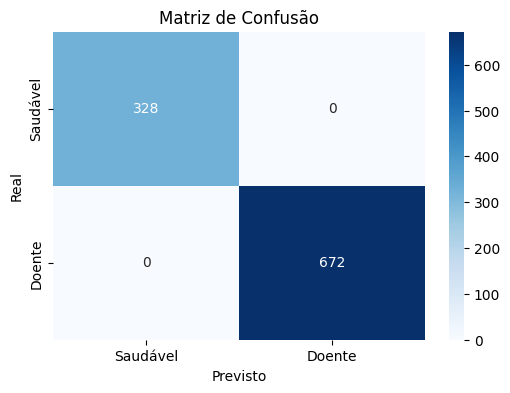

Paciente 1: Doente
Paciente 2: Saudável
Paciente 3: Doente
Paciente 4: Doente


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Carregando o dataset a partir do CSV
dataset_path = "https://raw.githubusercontent.com/mikeninerbravog/POC_ML_GBM/refs/heads/master/dataset_exames.csv"
df = pd.read_csv(dataset_path)

# 2. Separando em treino e teste (80% treino, 20% teste)
X = df.drop(columns=['doenca'])
y = df['doenca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Criando e treinando o modelo Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# 4. Testando o modelo
y_pred = gbm.predict(X_test)

# 5. Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# 6. Exibindo a Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Saudável', 'Doente'], yticklabels=['Saudável', 'Doente'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 7. Testando com novos pacientes
novos_pacientes = pd.DataFrame({
    'idade': [50, 30, 70, 45],
    'pressao_sanguinea': [160, 110, 150, 120],
    'nivel_glicose': [140, 90, 160, 110],
    'colesterol': [260, 180, 270, 220],
    'obesidade': [1, 0, 1, 0],
    'historico_familiar': [0, 0, 1, 1]
})

predicoes = gbm.predict(novos_pacientes)

# Exibindo os resultados
for i, pred in enumerate(predicoes):
    print(f"Paciente {i+1}: {'Doente' if pred == 1 else 'Saudável'}")
